**pseudo-invers**

In [ ]:
import numpy as np
import math

In [ ]:
distances = [0.5197,0.4404,0.4850,0.4222,0.4132,0.4371,0.3912,0.3949,1.3910,0.4276,0.4075,0.3956,2.4053,0.4752,0.5032,0.5273,0.4879]
degrees = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]

In [ ]:
import matplotlib.pyplot as plt

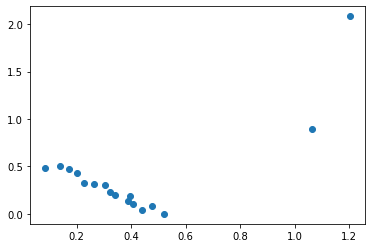

In [ ]:
points_x = []
points_y = []
for i in range(len(distances)):
  points_x.append(distances[i]*math.cos(degrees[i]*math.pi/180))
  points_y.append(distances[i]*math.sin(degrees[i]*math.pi/180))

plt.scatter(points_x, points_y)

In [ ]:
matrix = [ [0]*2 for i in range(len(points_x))]
for i in range(len(points_x)):
  matrix[i][0]=points_x[i]
  matrix[i][1]=points_y[i]

# matrix

In [ ]:
matrix_t = np.array(matrix).transpose()

# matrix_t

In [ ]:
c = [ [1]*1 for i in range(len(points_x))]

# c

In [ ]:
p = np.dot(matrix_t,matrix)
p = np.linalg.inv(p)
p = np.dot(p,matrix_t)
p = np.dot(p,c)

In [ ]:
p

array([[ 1.76467642],
       [-0.13710987]])

In [ ]:
# ax + by = 1 --> y = -a/b*x + 1/b
p[0]=(-1*p[0])/p[1]
p[1]=1/p[1]

In [ ]:
dots_x = []
dots_y = []
dots_x.append(min(points_x))
dots_x.append(max(points_x))
dots_y.append(p[0]*min(points_x)+p[1])
dots_y.append(p[0]*max(points_x)+p[1])

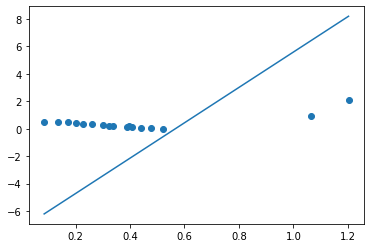

In [ ]:
plt.scatter(points_x, points_y)
plt.plot(dots_x,dots_y)

In [ ]:
# # with library
# xx = np.linalg.pinv(matrix)
# xx = np.dot(xx,c)

# # ax + by = 1 --> y = -a/b*x + 1/b
# xx[0]=(-1*xx[0])/xx[1]
# xx[1]=1/xx[1]

# dots_x_prime = []
# dots_y_prime = []
# dots_x_prime.append(min(points_x))
# dots_x_prime.append(max(points_x))
# dots_y_prime.append(xx[0]*min(points_x)+xx[1])
# dots_y_prime.append(xx[0]*max(points_x)+xx[1])

# plt.scatter(points_x, points_y)
# plt.plot(dots_x_prime,dots_y_prime)


**RANSAC**

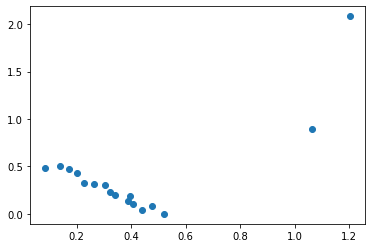

In [ ]:
plt.scatter(points_x, points_y)

In [ ]:
def find_line_model(x1,y1,x2,y2):
    if (x2-x1==0):
      return math.inf,math.inf
    m = (y2-y1) / (x2-x1) 
    c = y1 - m * x1     
    return m, c

In [ ]:
def find_intercept_point(m, c, x0, y0):
    x = (x0 + m*y0 - m*c)/(1 + m**2)
    y = (m*x0 + (m**2)*y0 - (m**2)*c)/(1 + m**2) + c
    return x, y

In [ ]:
first_point = []
for i in range(len(points_x)):
  first_point.append((points_x[i],points_y[i]))

# first_point

In [ ]:
trsh = 0.1
number_save = 0
dots = [0,0,0,0]

for i in range(len(first_point)):
  for j in range(1,len(first_point)):
    m,c = find_line_model(first_point[i][0],first_point[i][1],first_point[j][0],first_point[j][1])
    number = 0
    for k in range(len(first_point)):
      if ((i!=k) and (j!=k)):
        x_new,y_new = find_intercept_point(m,c,first_point[k][0],first_point[k][1])
        distance = math.sqrt((first_point[k][0] - x_new)**2 + (first_point[k][1] - y_new)**2)
        if distance < trsh:
          number += 1
    if (number>number_save):
      number_save = number 
      dots = [first_point[i][0],first_point[i][1],first_point[j][0],first_point[j][1]]
dots

[0.5197, 0.0, 0.40781388385924466, 0.10927340084228426]

In [ ]:
m,c = find_line_model(dots[0],dots[1],dots[2],dots[3])

In [ ]:
dots_x = []
dots_y= []
dots_x.append(dots[0])
dots_x.append(dots[1])
dots_y.append(m*dots[0]+c)
dots_y.append(m*dots[1]+c)

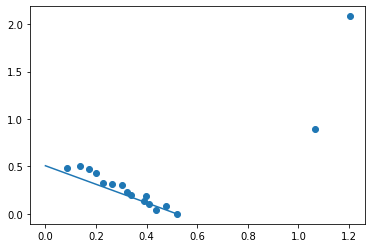

In [ ]:
plt.scatter(points_x, points_y)
plt.plot(dots_x,dots_y)

**using RANSAC to solve the problem of pseudo-invers by removing outliers**

In [ ]:
trsh = 1
remaining_points_x = []
remaining_points_y = []
for i in range(len(points_x)):
  x_new,y_new = find_intercept_point(m,c,points_x[i],points_y[i])
  distance = math.sqrt((points_x[i] - x_new)**2 + (points_y[i] - y_new)**2)
  if (distance<trsh):
    remaining_points_x.append(points_x[i])
    remaining_points_y.append(points_y[i])

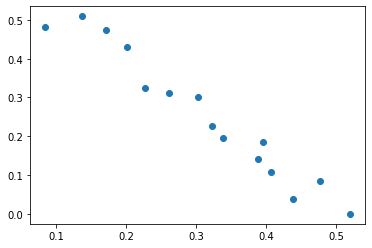

In [ ]:
plt.scatter(remaining_points_x, remaining_points_y)

In [ ]:
new_matrix = [ [0]*2 for i in range(len(remaining_points_x))]
for i in range(len(remaining_points_x)):
  new_matrix[i][0]=remaining_points_x[i]
  new_matrix[i][1]=remaining_points_y[i]

# new_matrix

In [ ]:
new_matrix_t = np.array(new_matrix).transpose()

# new_matrix_t

In [ ]:
new_c = [ [1]*1 for i in range(len(remaining_points_x))]

# new_c

In [ ]:
new_p = np.dot(new_matrix_t,new_matrix)
new_p = np.linalg.inv(new_p)
new_p = np.dot(new_p,new_matrix_t)
new_p = np.dot(new_p,new_c)

In [ ]:
new_p

array([[1.96381456],
       [1.51483872]])

In [ ]:
# ax + by = 1 --> y = -a/b*x + 1/b
new_p[0]=(-1*new_p[0])/new_p[1]
new_p[1]=1/new_p[1]

In [ ]:
new_dots_x = []
new_dots_y = []
new_dots_x.append(min(remaining_points_x))
new_dots_x.append(max(remaining_points_x))
new_dots_y.append(new_p[0]*min(remaining_points_x)+new_p[1])
new_dots_y.append(new_p[0]*max(remaining_points_x)+new_p[1])

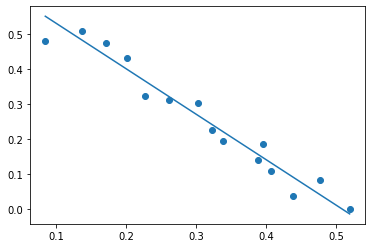

In [ ]:
plt.scatter(remaining_points_x, remaining_points_y)
plt.plot(new_dots_x,new_dots_y)

In [ ]:
# # with library
# xx = np.linalg.pinv(new_matrix)
# xx = np.dot(xx,new_c)

# # ax + by = 1 --> y = -a/b*x + 1/b
# xx[0]=(-1*xx[0])/xx[1]
# xx[1]=1/xx[1]

# dots_x_prime = []
# dots_y_prime = []
# dots_x_prime.append(min(remaining_points_x))
# dots_x_prime.append(max(remaining_points_x))
# dots_y_prime.append(xx[0]*min(remaining_points_x)+xx[1])
# dots_y_prime.append(xx[0]*max(remaining_points_x)+xx[1])

# plt.scatter(remaining_points_x, remaining_points_y)
# plt.plot(dots_x_prime,dots_y_prime)
